# My portfolios

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import robin_stocks as r
import etfs as et

In [3]:
from etfs.portfolio.io import import_portfolio, import_portfolio_robinhood, import_portfolio_vanguard, \
                              parse_portfolio, parse_portfolio_vanguard
from etfs.stats.basics import resample_df, runrate_column, shift_column, \
                              standard_deviation_column, difference, rsq, beta, alpha
from etfs.utils.helpers import todays_date
from etfs.visualization.trends import plot_composition
from etfs.visualization.analysis import plot_cross_correlation_matrix

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## RobinHood

In [5]:
# access password file
f = open("../../../.etfs.txt","r")
lines = f.readlines()
username = lines[0].strip().split('\n', 0)
password = lines[1].strip().split('\n', 0)
f.close()

In [6]:
access_token = r.login(username, password)

ERROR: There was an issue loading pickle file. Authentication may be expired - logging in normally.


Please type in the MFA code:  949014


In [7]:
rh = import_portfolio_robinhood(access_token=access_token,  
                                name="Robinhood", 
                                free_stock=True)

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Loading page 20 ...
Loading page 21 ...
Loading page 22 ...
Parsing orders ...
Parsing bank transfers ...
Parsing dividends ...
Adding promotional stock ...
Adding  UBER
Checking ../data/UBER.csv
Saving ../data/UBER.csv
Adding  ZM
Checking ../data/ZM.csv
Saving ../data/ZM.csv
Adding  WDAY
Checking ../data/WDAY.csv
Saving ../data/WDAY.csv
Adding  JPM
Checking ../data/JPM.csv
Saving ../data/JPM.csv
Adding  CCL
Checking ../data/CCL.csv
Saving ../data/CCL.csv
Adding  DB
Checking ../data/DB.csv
Saving ../data/DB.csv
Adding  W
Checking ../data/W.csv
Saving ../data/W.csv
Adding  PANW
Checking ../data/PANW.csv
Saving ../data

In [8]:
rh.overview()

        Quantity  AvgPriceAll  AvgPriceFiFo  AvgPriceLiFo     AvgPrice  \
Ticker                                                                   
AAPL         1.0   229.020000    280.100000    219.200000   109.270000   
AMZN         1.0  2141.800000   2318.400000   2318.400000  1923.690000   
APPN         4.0    48.050000     48.050000     48.050000    48.050000   
BYND         1.0   151.018747     90.720000     90.720000   747.749900   
CRSP         5.0    43.009881     48.747440     52.793600   -10.787420   
CRWD         4.0    80.476044     62.863350     59.485850    96.060025   
DDOG         5.0    38.860667     42.614000     42.240000    17.784000   
DKNG         6.0    19.990000     19.990000     19.990000    17.631667   
EVER         6.0    33.692980     33.503900     34.350000    77.140550   
FTNT         2.0    90.354167    104.246650    107.455000   111.015000   
GOOGL        1.0  1221.600000   1221.600000   1221.600000  1221.600000   
INTU         1.0   267.300000    270.7

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:343: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_df = _df.groupby(by=["Ticker"])[


In [9]:
rh.overview_archive()

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:475: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_archive_df = _df.groupby(by=["Ticker"])[


        Quantity  AvgPriceAll  LastPrice  TradeValue  Dividends     Return  \
Ticker                                                                       
AMD          0.0    16.825300      54.51    -29.0700        0.0    29.0700   
AYX          0.0    88.457955     125.50   -518.1303        0.0   518.1303   
BABA         0.0   159.298750     201.30   -136.0400        0.0   136.0400   
BIDU         0.0   156.580556      96.02    261.7200        0.0  -261.7200   
BLV          0.0   105.176673     108.55    -72.4296        0.0    72.4296   
BND          0.0    82.050000      87.30     -1.2000        0.0     1.2000   
BNDX         0.0    58.053347      57.22     31.3500        0.0   -31.3500   
CCL          0.0     8.321702      12.27   -275.6532        0.0   275.6532   
CHK          0.0     0.000000       8.71     -3.7000        0.0     3.7000   
CVS          0.0    63.250476      62.31    187.4500        0.0  -187.4500   
DB           0.0    13.130000       6.66      5.0500        0.0 

In [10]:
# parse alternative (SP500) portfolio first
rh_alt = import_portfolio(path="../data/portfolio_rh_alt.csv", name="RobinHood")

Reading in ../data/portfolio_rh_alt.csv
Adding  CHK
Checking ../data/CHK.csv
Saving ../data/CHK.csv
Adding  VOO
Checking ../data/VOO.csv
Saving ../data/VOO.csv
depositing 550.00 USD (new balance: 550.00 USD)
buying 1.00 CHK (new balance: 550.00 USD)
buying 2.00 VOO (new balance: 32.54 USD)
depositing 550.00 USD (new balance: 582.54 USD)
buying 2.00 VOO (new balance: 80.66 USD)
depositing 550.00 USD (new balance: 630.66 USD)
depositing 220.00 USD (new balance: 850.66 USD)
buying 2.00 VOO (new balance: 341.24 USD)
buying 1.00 VOO (new balance: 86.53 USD)
depositing 180.00 USD (new balance: 266.53 USD)
buying 1.00 VOO (new balance: 13.52 USD)
depositing 360.00 USD (new balance: 373.52 USD)
buying 2.00 VOO (new balance: -147.04 USD)
depositing 550.00 USD (new balance: 402.96 USD)
buying 2.00 VOO (new balance: -120.32 USD)
depositing 300.00 USD (new balance: 179.68 USD)
buying 1.00 VOO (new balance: -81.13 USD)
depositing 30.00 USD (new balance: -51.13 USD)
buying 1.00 VOO (new balance: -31

In [11]:
rh_alt.overview()

        Quantity  AvgPriceAll  AvgPriceFiFo  AvgPriceLiFo   AvgPrice  \
Ticker                                                                 
CHK          1.0     0.000000      0.000000      0.000000    0.00000   
VOO         83.0   254.428763    253.922048    251.942048  249.34494   

        LastPrice  TradeValue  CurrentValue  Dividends   Return  \
Ticker                                                            
CHK          8.71        0.00          8.71        0.0     8.71   
VOO        261.86    20695.63      21734.38        0.0  1038.75   

                          Description  
Ticker                                 
CHK     Chesapeake Energy Corporation  
VOO                               VOO  

Total portfolio value:	21917.74 USD
Total security value:	21743.09 USD
Cash in wallet:		  174.65 USD
Total return:		 1047.46 USD	(4.78%)


/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:343: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_df = _df.groupby(by=["Ticker"])[


In [12]:
rh.payments.sum()

In     24560.00
Out     3689.72
dtype: float64

In [13]:
rh_alt.payments.sum()

In     24560.00
Out     3689.72
dtype: float64

In [14]:
rh.positions()

        Quantity  Bought    Sold  CurrentValue    Invested    Devested  \
Ticker                                                                   
AMZN         1.0     2.0    -1.0   2388.850000   4283.6000  -2359.9100   
GOOGL        1.0     1.0     0.0   1356.860000   1221.6000      0.0000   
MELI         1.0    16.0   -15.0    777.270000   9378.6499  -8969.8500   
SHOP         1.0    12.0   -11.0    754.290000   5089.7501  -4962.3300   
SONO        68.0  1986.0 -1918.0    617.440000  27922.1937 -25918.2071   
W            3.0    67.0   -64.0    518.820000   5865.8102  -6473.0604   
PANW         2.0     3.0    -1.0    439.140000    545.2600   -194.2000   
TWLO         2.0     6.0    -4.0    383.720000    573.4200   -507.5300   
NOW          1.0     1.0     0.0    367.829987    368.3500      0.0000   
MSFT         2.0     9.0    -7.0    361.060000   1292.6900  -1033.3400   
OKTA         2.0    28.0   -26.0    354.640000   3236.0899  -3091.3100   
DDOG         5.0    15.0   -10.0    32

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:575: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.positions_df = _df.groupby(by=["Ticker"])[


In [15]:
rh.get_timeseries()

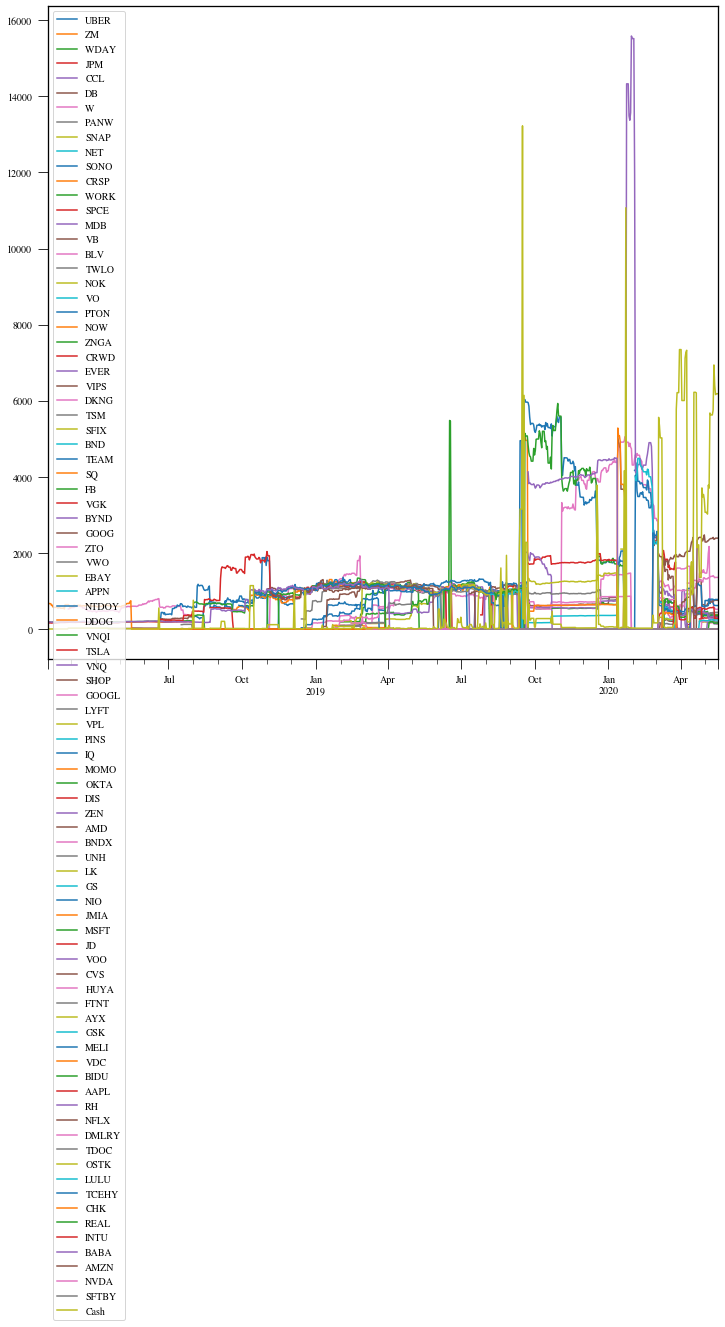

In [16]:
rh.data.plot(y=[column for column in rh.data.columns if column not in ['Total', 'Total_sh1', 'Total_sh1_ret', 'Total_sh1_sqerr']], 
               figsize=(12,12)
            )
#plt.ylim((0,2000))
#plt.yscale('symlog')

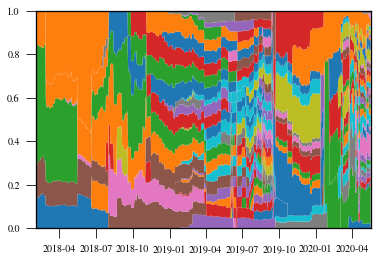

In [17]:
plot_composition(portfolio=rh)

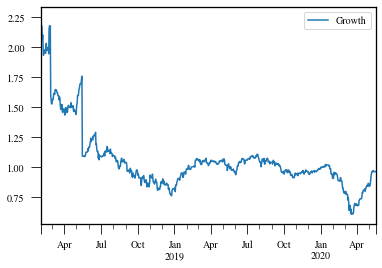

In [18]:
rh.data_growth.plot(y="Growth")

In [19]:
rh_alt.get_timeseries()

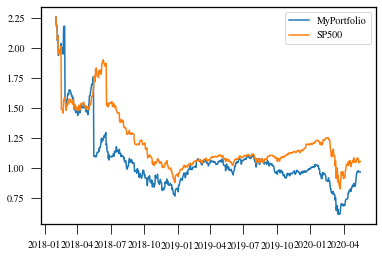

In [20]:
plt.plot(rh.data_growth.Growth[:], label='MyPortfolio')
plt.plot(rh_alt.data_growth.Growth[:], label='SP500')
plt.legend()

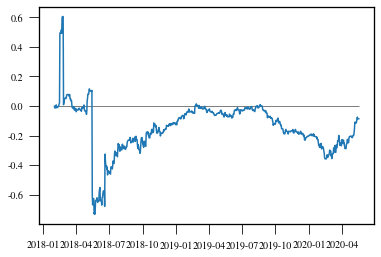

In [21]:
plt.plot(rh.data_growth.Growth-rh_alt.data_growth.Growth)
plt.hlines(0, xmin=min(rh.data_growth.index), xmax=max(rh.data_growth.index), linestyle='-', linewidth=0.5)

In [22]:
rh_alt.get_performance()

Year      Growth   Return
0  2018 -131.362481 -1499.25
1  2019   24.675330  4991.26
2  2020  -14.112124 -3136.55

In [23]:
rh.get_performance()

Year      Growth       Return
0  2018 -143.780239 -3332.238800
1  2019   17.120446  2418.187200
2  2020   -2.578021  -527.842299

In [24]:
# Volatility of portfolio
df_volatility = standard_deviation_column(rh.data, column='Total', window=1, shift=1)

Standard deviation of 'Total' is 0.0013232724567811245
Average volatility of 'Total' is 0.0363768120755671


In [25]:
rh.get_benchmark()

Checking ../data/^GSPC.csv
Saving ../data/^GSPC.csv


In [26]:
rh.get_returns()

In [27]:
total = et.TotalPortfolioValue(name="Total", data=rh.data) # to-do: turn this into portfolio object

In [28]:
df_volatility = standard_deviation_column(total.data, column='Total', window=1, shift=1)

Standard deviation of 'Total' is 0.0013232724567811245
Average volatility of 'Total' is 0.0363768120755671


In [29]:
total.get_returns()

In [30]:
total.get_benchmark()

Checking ../data/^GSPC.csv
Saving ../data/^GSPC.csv


In [31]:
total.benchmark.get_returns()

In [32]:
rsq(total, total.benchmark, col1='Return', col2='Return')

0.10868388625447815

In [33]:
beta(sec1=total, sec2=total.benchmark, col1='Return', col2='Return')

0.906010583500946

In [34]:
alpha(sec1=total, sec2=total.benchmark, col1='Return', col2='Return', risk_free_rate=.004484)

0.0028938106649151335

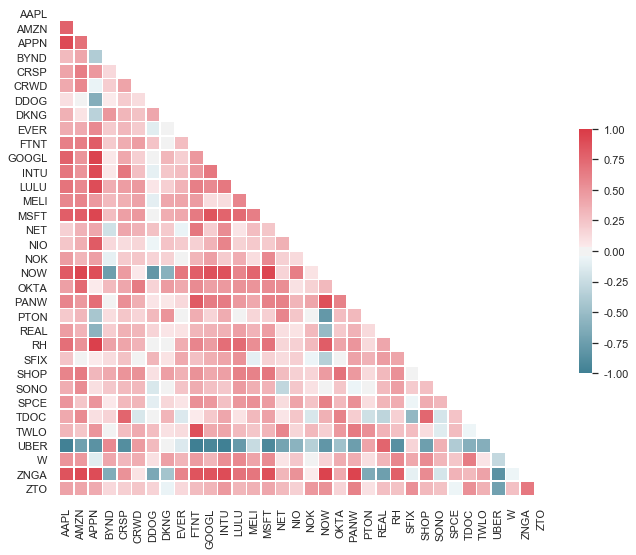

In [35]:
# show correlation of positions
plot_cross_correlation_matrix(portfolio=rh)

## Put in stop loss orders for Robinhood stocks

In [36]:
#from etfs.trader.orders import put_in_stop_loss_orders_all

put_in_stop_loss_orders_all(access_token=access_token, 
                            portfolio=rh, 
                            column="Close", 
                            alpha=.5, 
                            sigmas=1)

## Vanguard

In [37]:
vg = import_portfolio_vanguard(path="../data/portfolio_vanguard*.csv", name="Vanguard")

Reading in ../data/portfolio_vanguard_2017.csv
Reading in ../data/portfolio_vanguard_2_2018.csv
Reading in ../data/portfolio_vanguard_2_2019.csv
Reading in ../data/portfolio_vanguard_2_2020.csv
Reading in ../data/portfolio_vanguard_2_2017.csv
Reading in ../data/portfolio_vanguard_2019.csv
Reading in ../data/portfolio_vanguard_2018.csv
Reading in ../data/portfolio_vanguard_2020.csv
Adding  BNDX
Checking ../data/BNDX.csv
Saving ../data/BNDX.csv
Adding  VCLT
Checking ../data/VCLT.csv
Saving ../data/VCLT.csv
Adding  VPL
Checking ../data/VPL.csv
Saving ../data/VPL.csv
Adding  VDC
Checking ../data/VDC.csv
Saving ../data/VDC.csv
Adding  VB
Checking ../data/VB.csv
Saving ../data/VB.csv
Adding  VAW
Checking ../data/VAW.csv
Saving ../data/VAW.csv
Adding  VNQI
Checking ../data/VNQI.csv
Saving ../data/VNQI.csv
Adding  VWO
Checking ../data/VWO.csv
Saving ../data/VWO.csv
Adding  BLV
Checking ../data/BLV.csv
Saving ../data/BLV.csv
Adding  VOO
Checking ../data/VOO.csv
Saving ../data/VOO.csv
Adding  VN

In [38]:
vg.overview()     

        Quantity  AvgPriceAll  AvgPriceFiFo  AvgPriceLiFo    AvgPrice  \
Ticker                                                                  
BLV       98.668   107.489429    108.081276    107.603622  107.124913   
BNDX     151.222    56.577702     56.768926     56.507060   56.498720   
VB        13.442   130.033902    119.205815    146.750769  131.562839   
VDC        9.641   140.214536    139.486489    142.472778  128.578701   
VGK       93.138    48.641574     42.624713     56.947471   50.976098   
VNQ       24.810    77.307681     73.108913     75.703913   77.808137   
VNQI      32.064    49.819963     42.935000     57.365141   55.215423   
VO         4.153   147.463392    141.661025    154.382500  140.284464   
VOO       33.730   247.354342    242.984844    252.982875  216.688048   
VPL       50.041    60.768526     54.977766     71.345426   64.440000   
VWO       51.740    38.825470     34.319375     45.910375   42.851933   

        LastPrice    TradeValue  CurrentValue  Div

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:343: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_df = _df.groupby(by=["Ticker"])[


In [39]:
vg.overview_archive()

        Quantity  AvgPriceAll  LastPrice  TradeValue  Dividends      Return  \
Ticker                                                                        
VAW          0.0   129.981125     107.15   95.419346      40.02  -55.399346   
VCLT         0.0    91.172727     100.19 -155.011233      95.28  250.291233   

                                              Description  
Ticker                                                     
VAW              Vanguard Materials Index Fund ETF Shares  
VCLT    Vanguard Long-Term Corporate Bond Index Fund E...  


/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:475: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_archive_df = _df.groupby(by=["Ticker"])[


In [40]:
vg.positions()

        Quantity   Bought     Sold  CurrentValue      Invested     Devested  \
Ticker                                                                        
BLV       98.668  105.668   -7.000   10710.41140  11356.495910   -786.69500   
VOO       33.730  114.730  -81.000    8832.53780  28403.072864 -21094.18500   
BNDX     151.222  163.222  -12.000    8652.92284   9233.547377   -689.69800   
VGK       93.138  283.138 -190.000    4134.39582  13797.361861  -9049.55000   
VPL       50.041  176.041 -126.000    2921.39358  10716.701346  -7492.05930   
VWO       51.740  176.740 -125.000    1873.50540   6872.434010  -4655.27500   
VNQ       24.810   70.810  -46.000    1713.62670   5486.854886  -3556.43500   
VB        13.442   45.442  -32.000    1705.11770   5918.287187  -4149.81950   
VDC        9.641   25.641  -16.000    1392.73886   3598.881259  -2359.25400   
VNQI      32.064   90.064  -58.000    1385.16480   4508.832325  -2738.40500   
VO         4.153   13.153   -9.000     609.53581   1

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:575: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.positions_df = _df.groupby(by=["Ticker"])[


In [41]:
vg.get_timeseries()

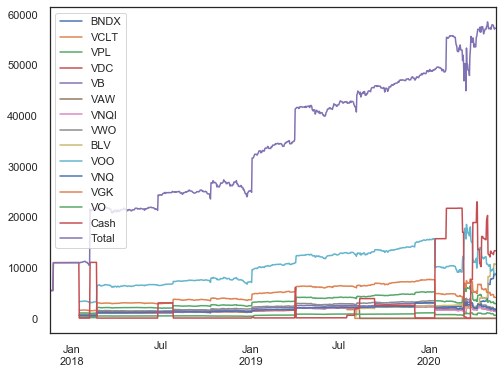

In [42]:
ax = vg.data.plot(y=vg.data.columns,
                  figsize=(8,6)
                 )

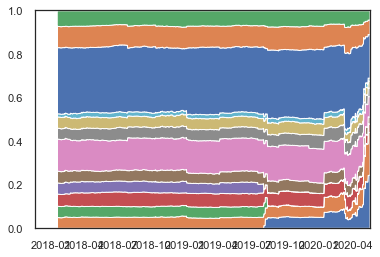

In [43]:
plot_composition(portfolio=vg)

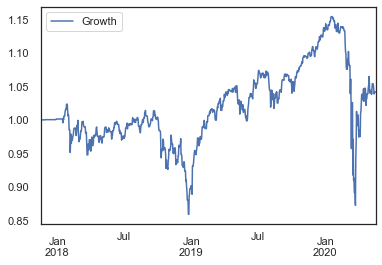

In [44]:
vg.data_growth.plot(y="Growth")

In [45]:
vg.get_performance()

Year     Growth       Return
0  2017   0.127727    14.050000
1  2018  -9.973629 -2770.902575
2  2019  23.448900  8606.246550
3  2020  -9.437819 -3558.495979

In [46]:
vg.get_benchmark()

Checking ../data/^GSPC.csv
Saving ../data/^GSPC.csv


In [47]:
# Volatility of portfolio
df_volatility = standard_deviation_column(vg.data, column='Total', window=1, shift=1)

Standard deviation of 'Total' is 0.00078896340192267
Average volatility of 'Total' is 0.028088492339794068


In [48]:
df_volatility = standard_deviation_column(vg.benchmark.data, column='Close', window=1, shift=1)

Standard deviation of 'Close' is 0.00023189564310010694
Average volatility of 'Close' is 0.015228120143343595


In [49]:
total = et.TotalPortfolioValue(name="Total", data=vg.data) # to-do: turn this into portfolio object

In [50]:
total.get_benchmark()

Checking ../data/^GSPC.csv
Saving ../data/^GSPC.csv


In [51]:
total.get_returns()

In [52]:
rsq(total, total.benchmark, col1='Return', col2='Return')

0.0760597904616388

In [53]:
beta(sec1=total, sec2=total.benchmark, col1='Return', col2='Return')

0.8048682905795547

In [54]:
alpha(sec1=total, sec2=total.benchmark, col1='Return', col2='Return', risk_free_rate=.004484)

0.0015644782270830115

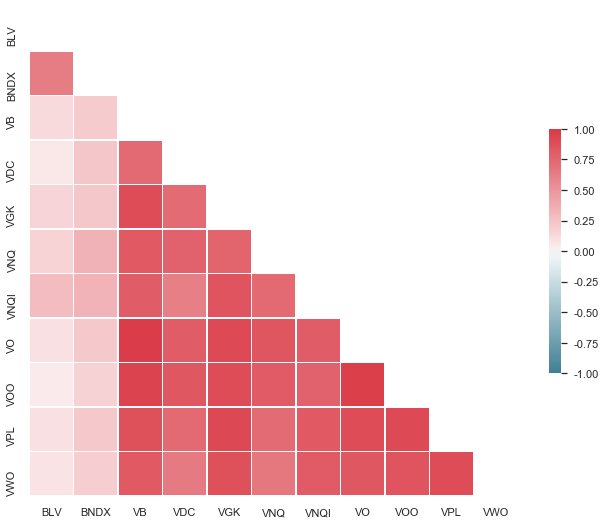

In [55]:
# show correlation of positions
plot_cross_correlation_matrix(portfolio=vg)

## Add up portfolios

In [56]:
tot = et.Portfolio(name="tot")

In [57]:
tot = parse_portfolio([rh.transactions, vg.transactions], tot)

Adding  WDAY
Checking ../data/WDAY.csv
Saving ../data/WDAY.csv
Adding  ZM
Checking ../data/ZM.csv
Saving ../data/ZM.csv
Adding  JPM
Checking ../data/JPM.csv
Saving ../data/JPM.csv
Adding  CCL
Checking ../data/CCL.csv
Saving ../data/CCL.csv
Adding  DB
Checking ../data/DB.csv
Saving ../data/DB.csv
Adding  W
Checking ../data/W.csv
Saving ../data/W.csv
Adding  SNAP
Checking ../data/SNAP.csv
Saving ../data/SNAP.csv
Adding  NET
Checking ../data/NET.csv
Saving ../data/NET.csv
Adding  SONO
Checking ../data/SONO.csv
Saving ../data/SONO.csv
Adding  CRSP
Checking ../data/CRSP.csv
Saving ../data/CRSP.csv
Adding  WORK
Checking ../data/WORK.csv
Saving ../data/WORK.csv
Adding  SPCE
Checking ../data/SPCE.csv
Saving ../data/SPCE.csv
Adding  MDB
Checking ../data/MDB.csv
Saving ../data/MDB.csv
Adding  PANW
Checking ../data/PANW.csv
Saving ../data/PANW.csv
Adding  VB
Checking ../data/VB.csv
Saving ../data/VB.csv
Adding  BLV
Checking ../data/BLV.csv
Saving ../data/BLV.csv
Adding  VO
Checking ../data/VO.csv

In [58]:
tot.get_timeseries()

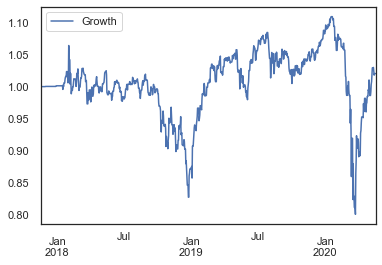

In [59]:
tot.data_growth.plot(y=["Growth"])

In [60]:
tot.get_performance()

Year     Growth        Return
0  2017   0.127727     14.050000
1  2018 -12.811166  -5412.121375
2  2019  21.356587  11024.433750
3  2020  -6.643368  -4086.338279

In [61]:
tot.overview()

            Quantity  AvgPriceAll  AvgPriceFiFo  AvgPriceLiFo      AvgPrice  \
Ticker                                                                        
AAPL    1.000000e+00   229.020000    280.100000    219.200000  1.092700e+02   
AMZN    1.000000e+00  2141.800000   2318.400000   2318.400000  1.923690e+03   
APPN    4.000000e+00    48.050000     48.050000     48.050000  4.805000e+01   
BLV     9.866800e+01   106.975483    108.081276    107.603622  1.063908e+02   
BNDX    1.512220e+02    56.847363     56.768926     56.507060  5.670603e+01   
BYND    1.000000e+00   151.018747     90.720000     90.720000  7.477499e+02   
CRSP    5.000000e+00    43.009881     48.747440     52.793600 -1.078742e+01   
CRWD    4.000000e+00    80.476044     62.863350     59.485850  9.606002e+01   
DDOG    5.000000e+00    38.860667     42.662000     42.192000  1.778400e+01   
DKNG    6.000000e+00    19.990000     19.990000     19.990000  1.763167e+01   
EVER    6.000000e+00    33.692980     33.503900     

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:343: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_df = _df.groupby(by=["Ticker"])[


In [62]:
tot.positions()

            Quantity    Bought      Sold  CurrentValue      Invested  \
Ticker                                                                 
BLV     9.866800e+01   135.668   -37.000  1.071041e+04  14511.796110   
VOO     3.373000e+01   134.730  -101.000  8.832538e+03  33973.692364   
BNDX    1.512220e+02   199.222   -48.000  8.652923e+03  11323.467877   
VGK     9.313800e+01   363.138  -270.000  4.134396e+03  17960.950661   
VPL     5.004100e+01   205.041  -155.000  2.921394e+03  12633.571346   
AMZN    1.000000e+00     2.000    -1.000  2.388850e+03   4283.600000   
VWO     5.174000e+01   207.740  -156.000  1.873505e+03   8156.344010   
VNQ     2.481000e+01    87.810   -63.000  1.713627e+03   7010.705286   
VB      1.344200e+01    53.442   -40.000  1.705118e+03   7146.227187   
VDC     9.641000e+00    32.641   -23.000  1.392739e+03   4676.591259   
VNQI    3.206400e+01   115.064   -83.000  1.385165e+03   5904.712825   
GOOGL   1.000000e+00     1.000     0.000  1.356860e+03   1221.60

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:575: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.positions_df = _df.groupby(by=["Ticker"])[


In [63]:
tot.overview_df['Growth'] = tot.overview_df['Return']/tot.overview_df['CurrentValue']*100

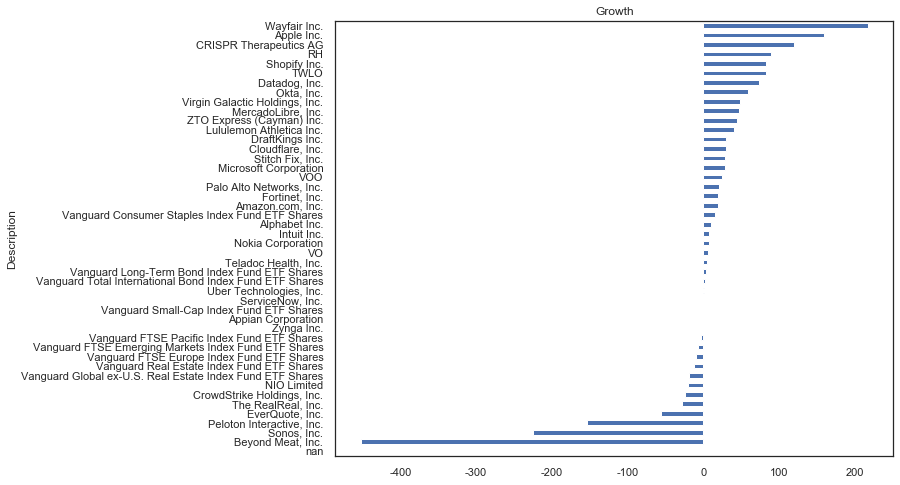

In [64]:
ax = tot.overview_df.sort_values(by='Growth', ascending=True).plot(x='Description', 
                                                                   y='Growth', 
                                                                   kind='barh', 
                                                                   legend=False, 
                                                                   title='Growth',
                                                                   figsize=(10,8)
                                                                  )

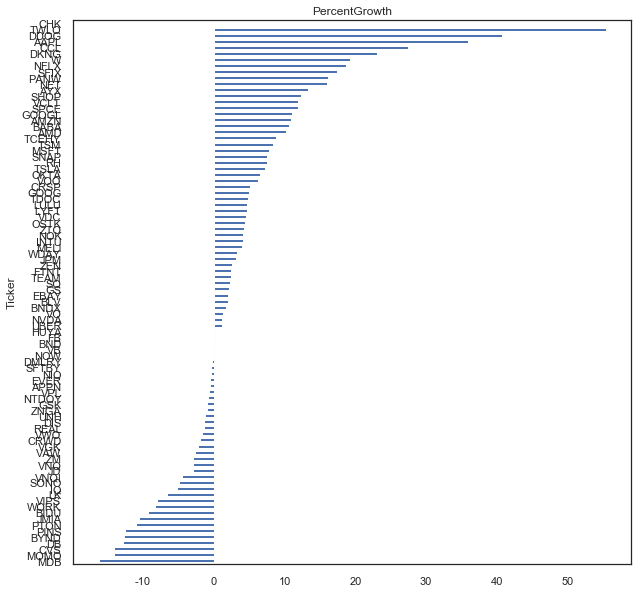

In [65]:
ax = tot.positions_df.reset_index().sort_values(by='PercentGrowth', ascending=True).plot(x='Ticker', 
                                                                                         y='PercentGrowth', 
                                                                                         kind='barh', 
                                                                                         legend=False, 
                                                                                         title='PercentGrowth',
                                                                                         figsize=(10,10)
                                                                                        )

In [66]:
tot.overview_df['PriceChange'] = 100-tot.overview_df['AvgPriceFiFo']/tot.overview_df['LastPrice']*100

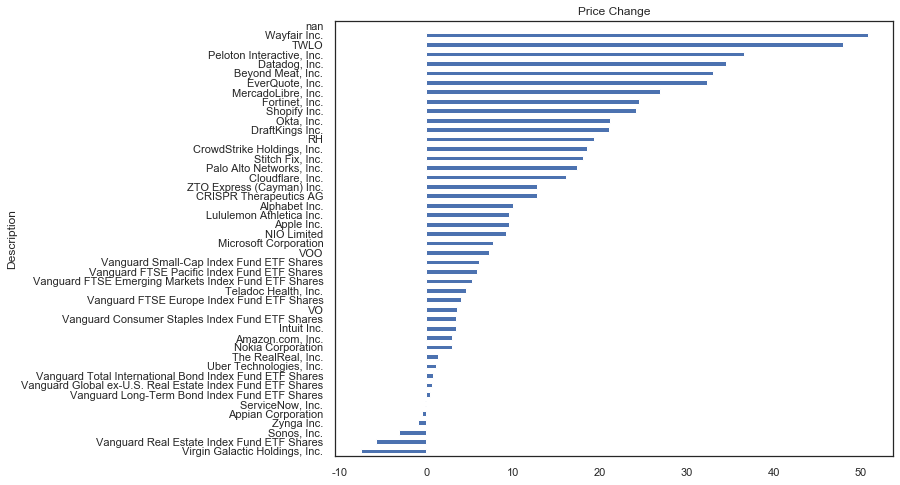

In [67]:
ax = tot.overview_df.sort_values(by='PriceChange', ascending=True).plot(x='Description', 
                                                                        y='PriceChange', 
                                                                        kind='barh', 
                                                                        legend=False, 
                                                                        title='Price Change',
                                                                        figsize=(10,8)
                                                                       )

In [68]:
tot.overview_archive()

        Quantity  AvgPriceAll  LastPrice   TradeValue  Dividends       Return  \
Ticker                                                                          
AMD          0.0    16.825300      54.51   -29.070000       0.00    29.070000   
AYX          0.0    88.457955     125.50  -518.130300       0.00   518.130300   
BABA         0.0   159.298750     201.30  -136.040000       0.00   136.040000   
BIDU         0.0   156.580556      96.02   261.720000       0.00  -261.720000   
BND          0.0    82.050000      87.30    -1.200000       0.00     1.200000   
CCL          0.0     8.321702      12.27  -275.653200       0.00   275.653200   
CHK          0.0     0.000000       8.71    -3.700000       0.00     3.700000   
CVS          0.0    63.250476      62.31   187.450000       0.00  -187.450000   
DB           0.0    13.130000       6.66     5.050000       0.00    -5.050000   
DIS          0.0   112.016000     105.91     7.360000       0.00    -7.360000   
DMLRY        0.0    12.94962

/Users/akuepper/DataScience/etfs/etfs/portfolio/portfolio.py:475: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.overview_archive_df = _df.groupby(by=["Ticker"])[


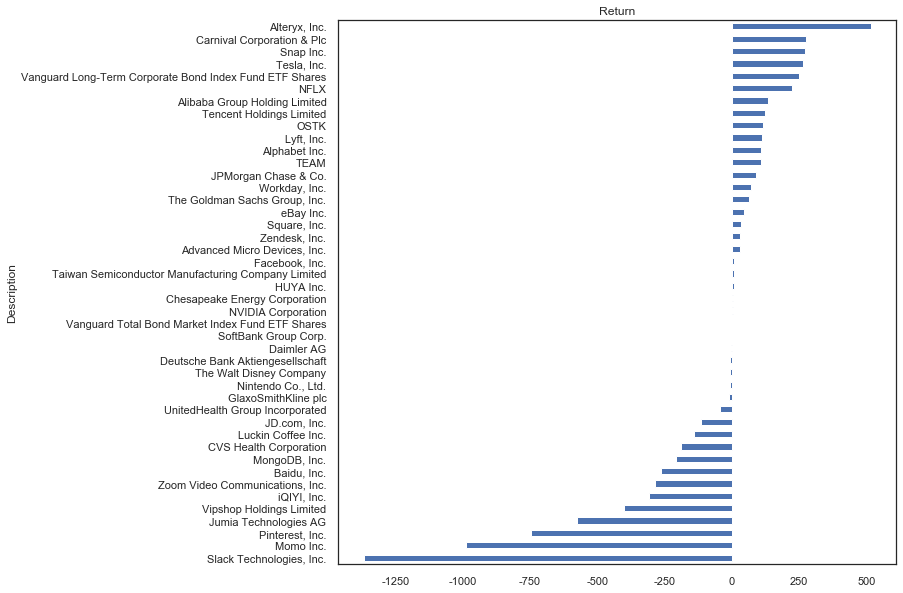

In [69]:
ax = tot.overview_archive_df.sort_values(by='Return', ascending=True).plot(x='Description', 
                                                                   y='Return', 
                                                                   kind='barh', 
                                                                   legend=False, 
                                                                   title='Return',
                                                                   figsize=(10,10)
                                                                  )

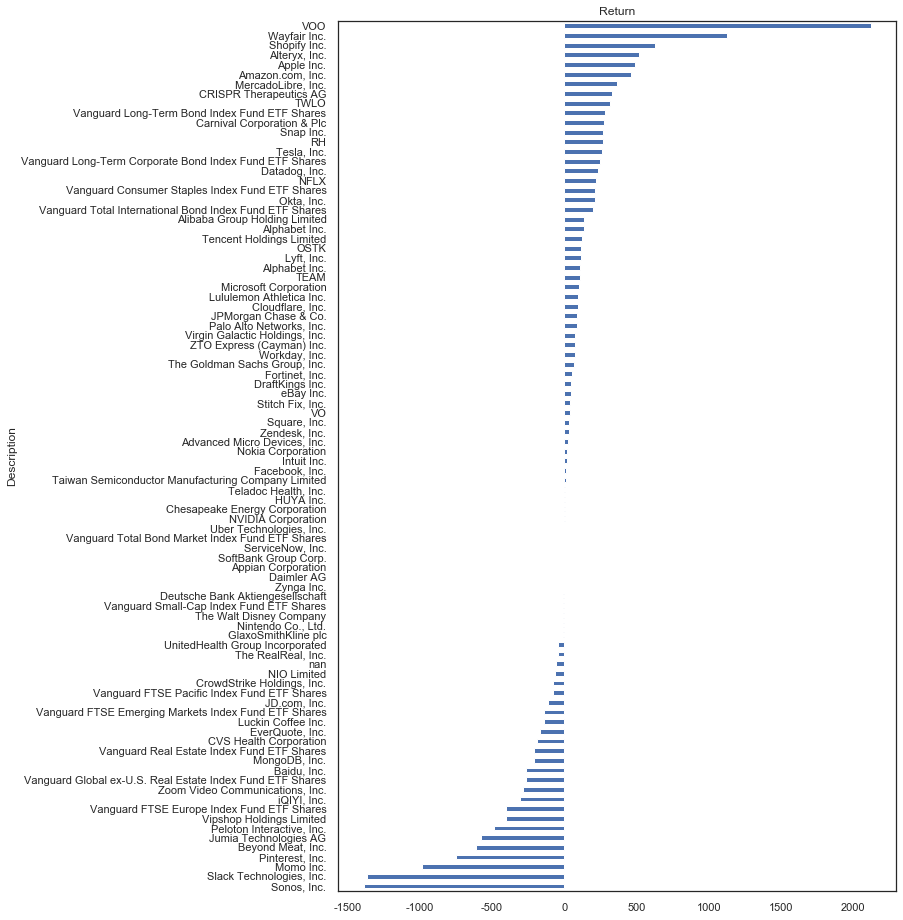

In [70]:
ax = pd.concat([tot.overview_df, tot.overview_archive_df], axis=0, ignore_index=True, sort=False).sort_values(by='Return', ascending=True).plot(x='Description', 
                                                                   y='Return', 
                                                                   kind='barh', 
                                                                   legend=False, 
                                                                   title='Return',
                                                                   figsize=(10,16)
                                                                  )

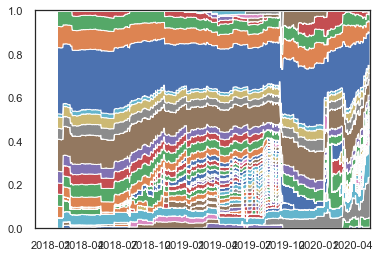

In [71]:
plot_composition(portfolio=tot)

In [72]:
total = et.TotalPortfolioValue(name="Total", data=tot.data) # to-do: turn this into portfolio object

In [73]:
total.get_returns()

In [74]:
total.get_benchmark()

Checking ../data/^GSPC.csv
Refresh failed


In [75]:
rsq(sec1=total, sec2=total.benchmark, col1='Return', col2='Return')

0.08561194890527929

In [76]:
beta(sec1=total, sec2=total.benchmark, col1='Return', col2='Return')

0.8193381885826045

In [77]:
alpha(sec1=total, sec2=total.benchmark, col1='Return', col2='Return', risk_free_rate=.004484)

0.0019570365606764117

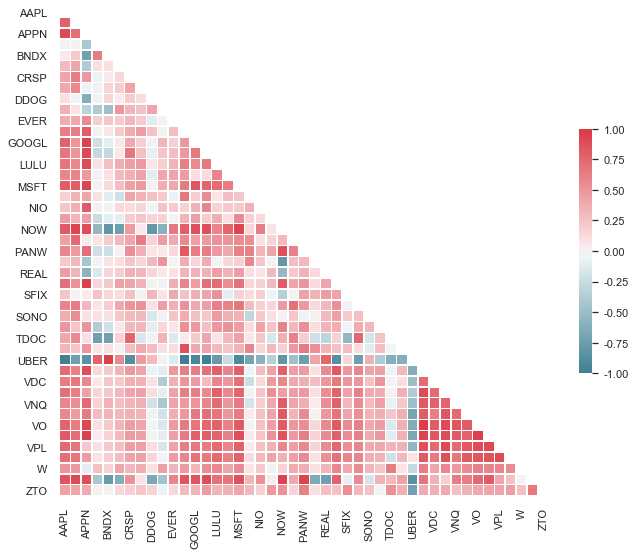

In [78]:
# show correlation of positions
plot_cross_correlation_matrix(portfolio=tot)

## Performance analysis of individual securities

In [79]:
from etfs.visualization.analysis import plot_security_performance

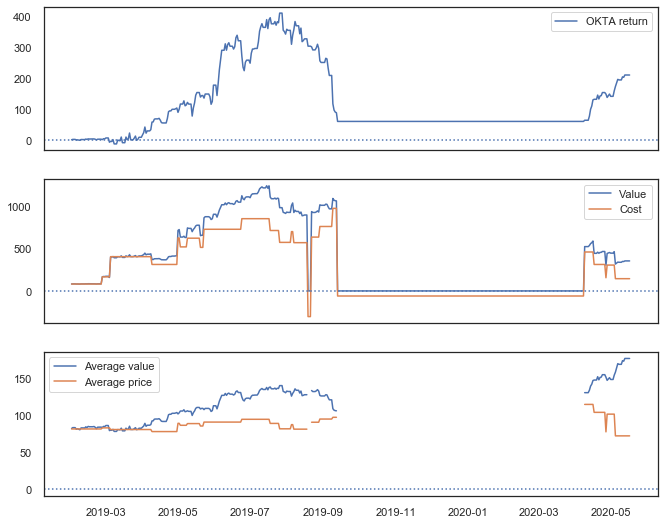

In [80]:
plot_security_performance(portfolio=tot, ticker='OKTA')

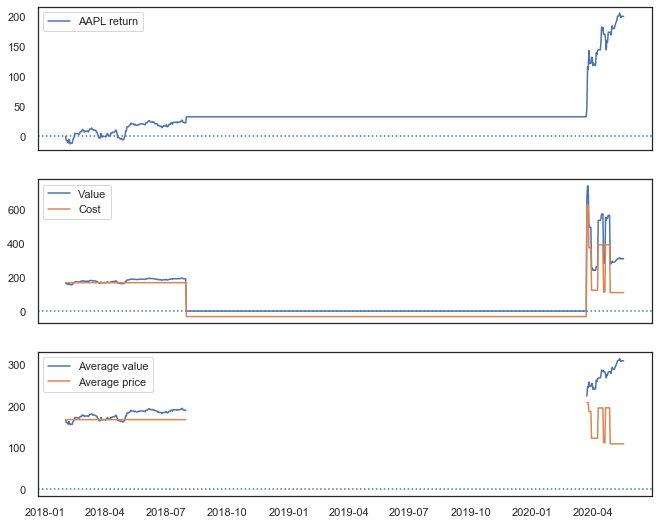

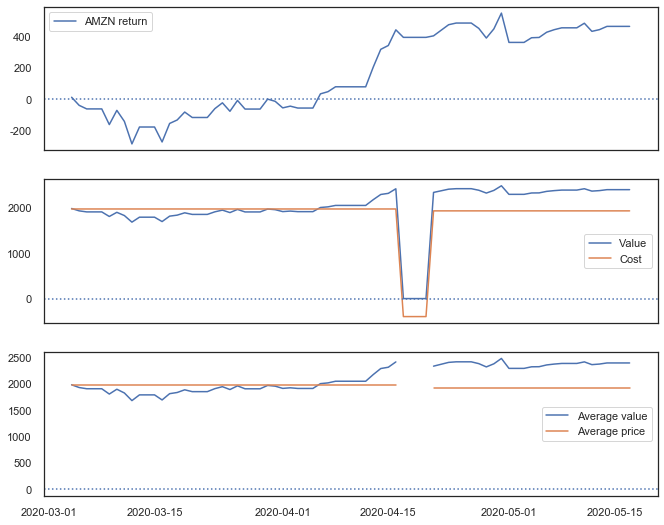

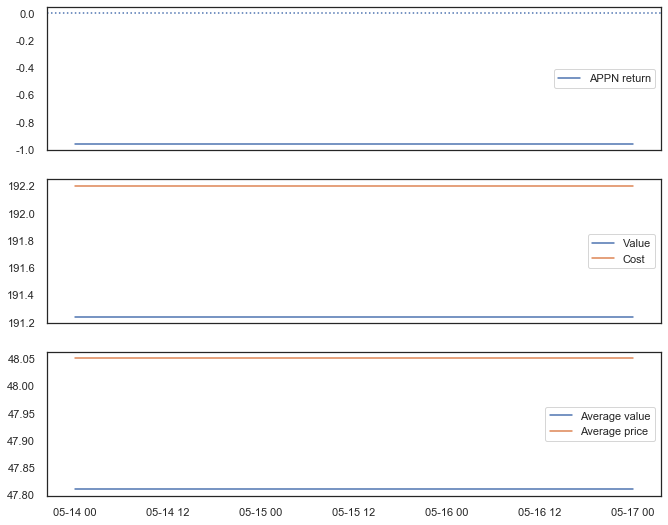

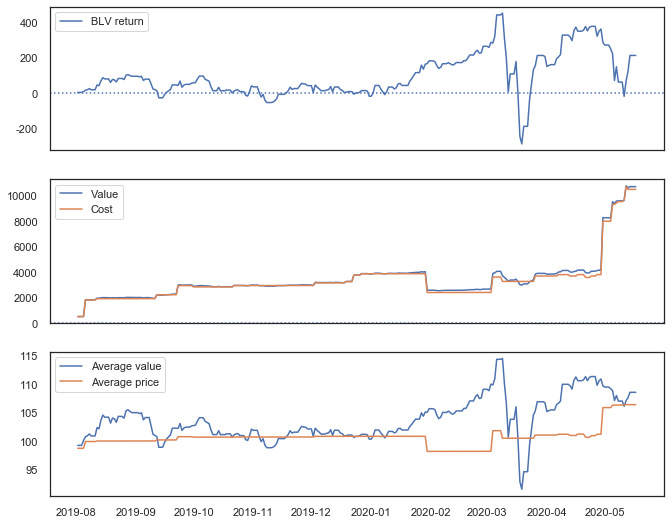

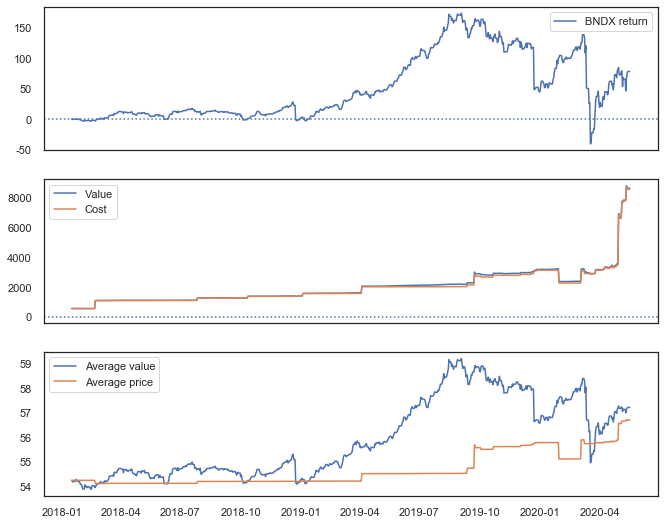

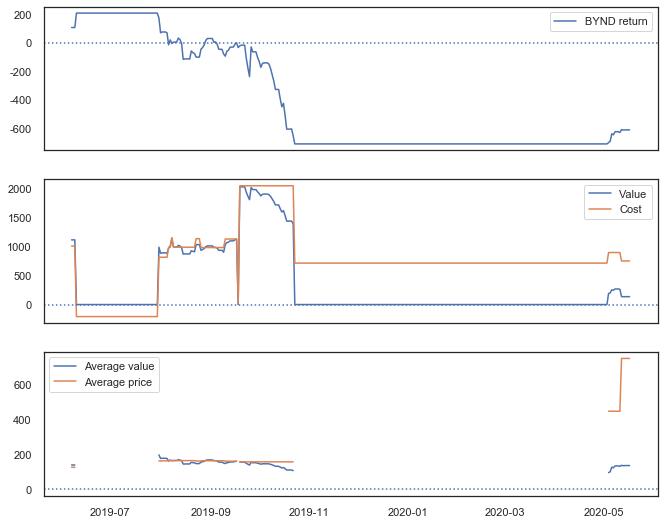

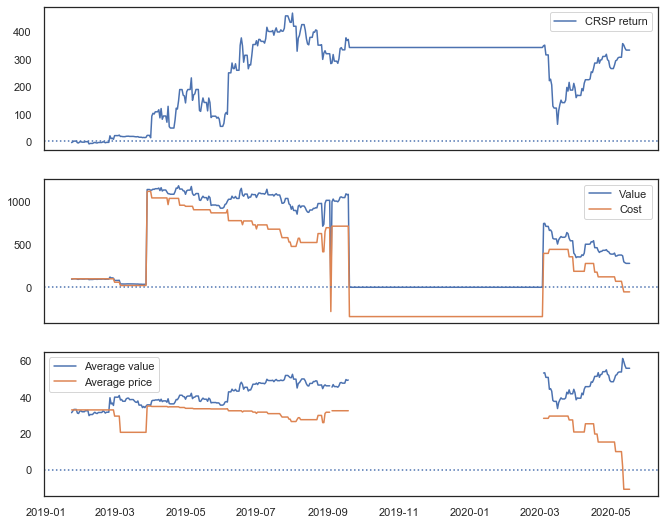

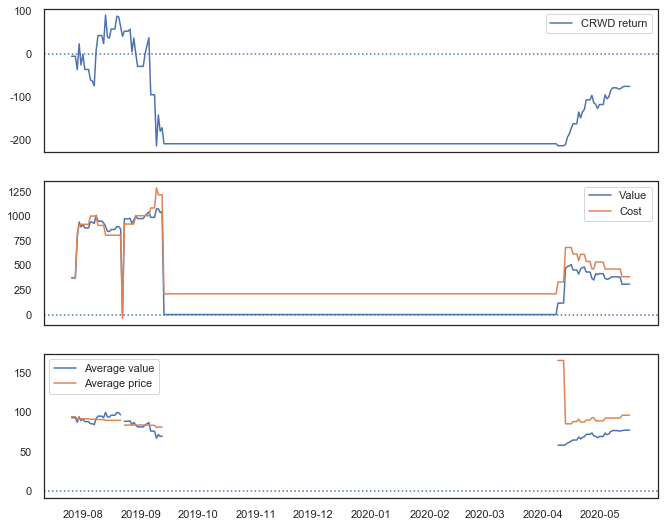

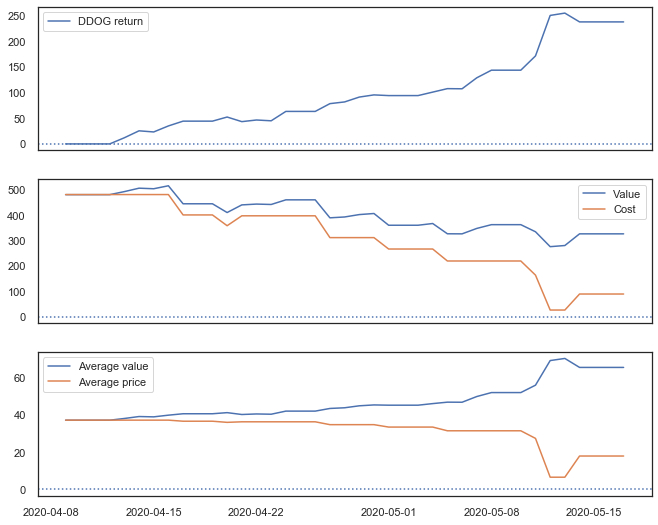

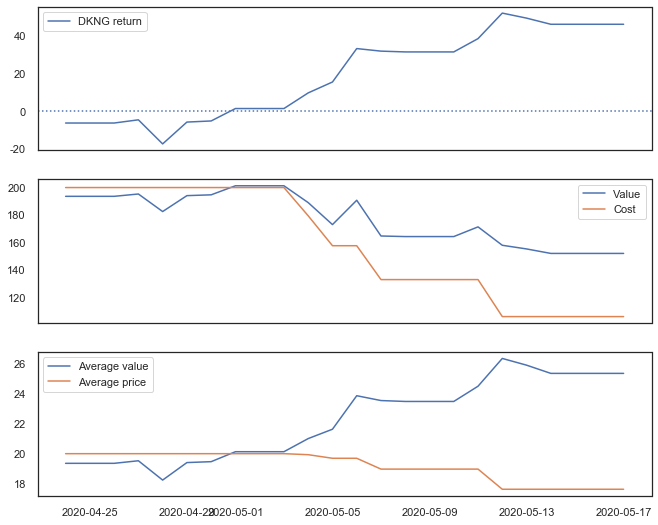

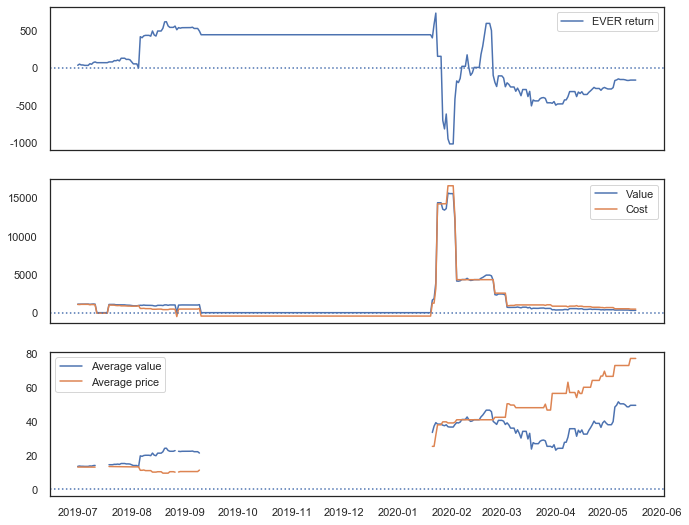

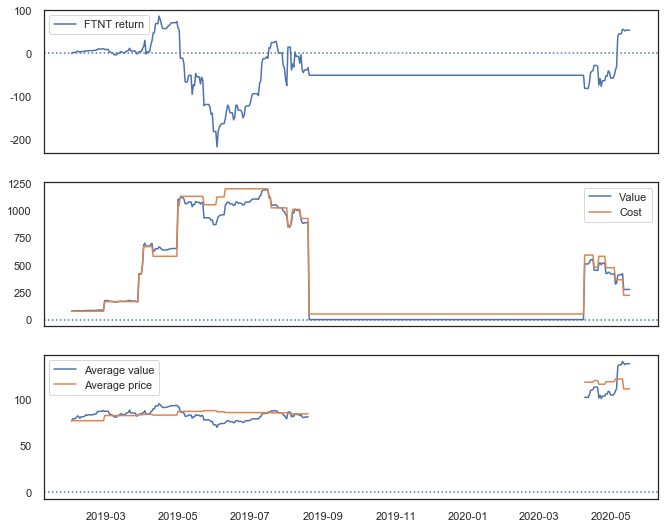

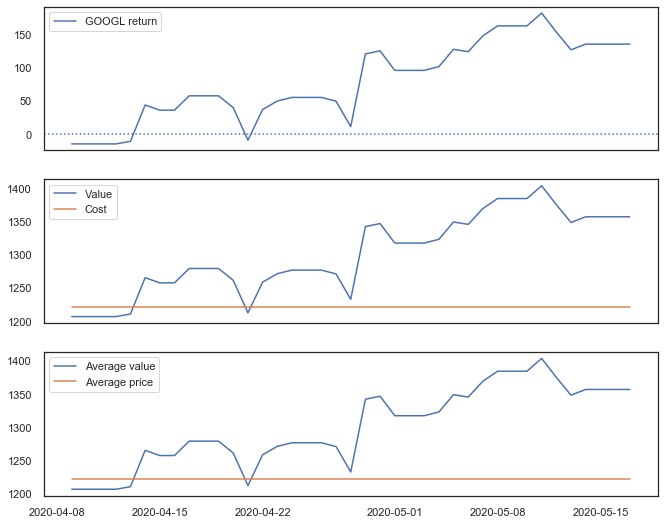

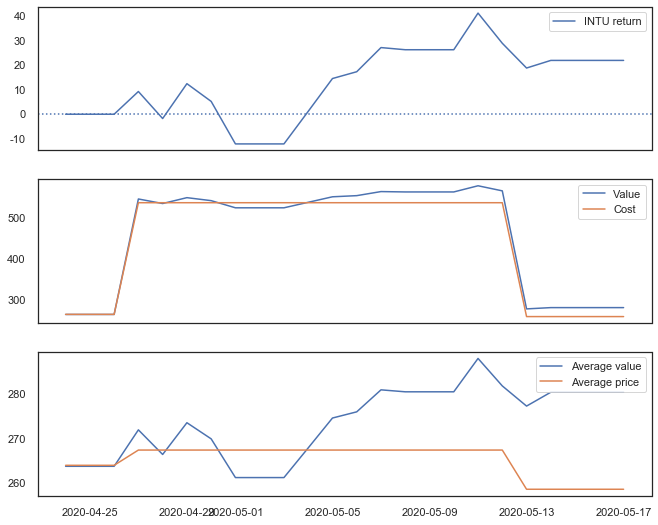

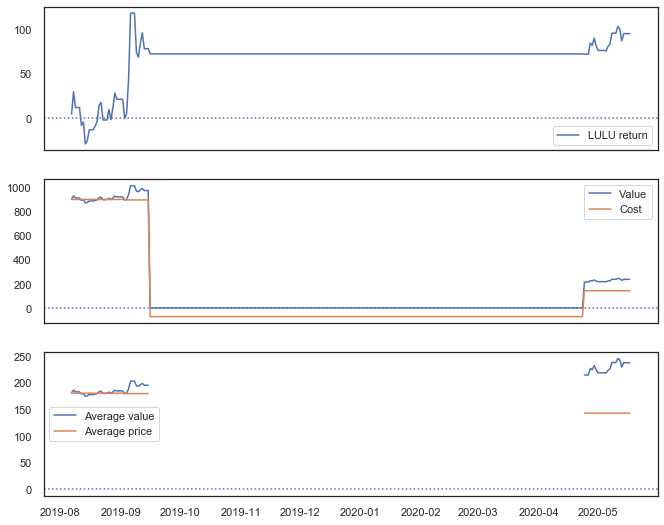

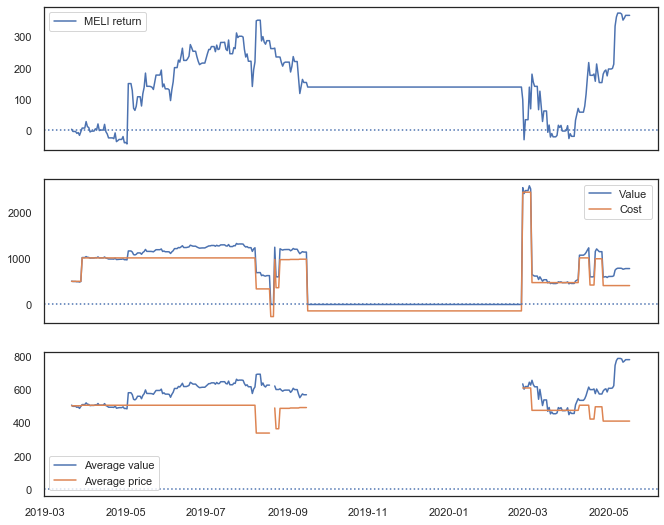

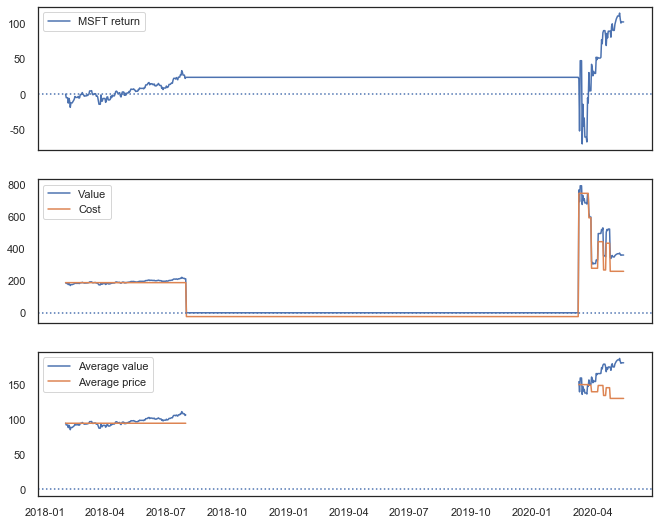

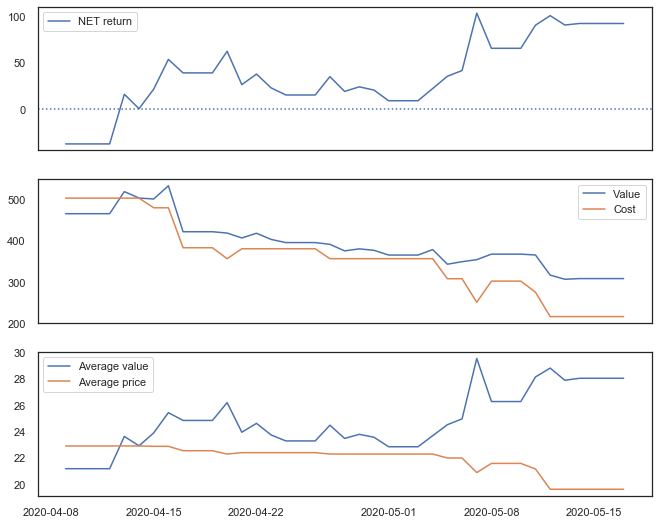

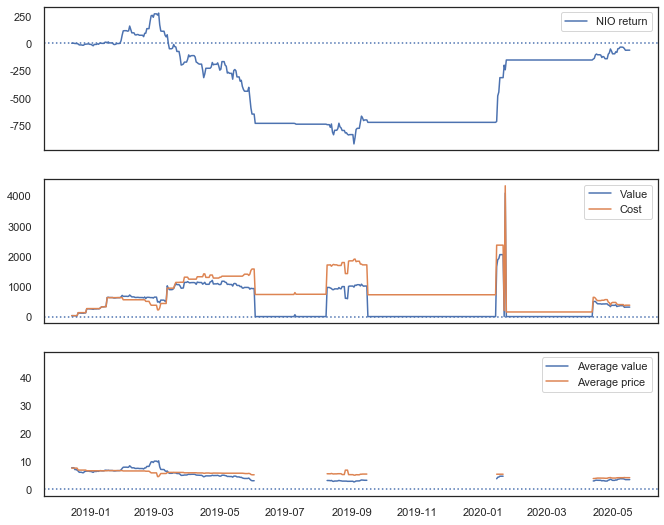

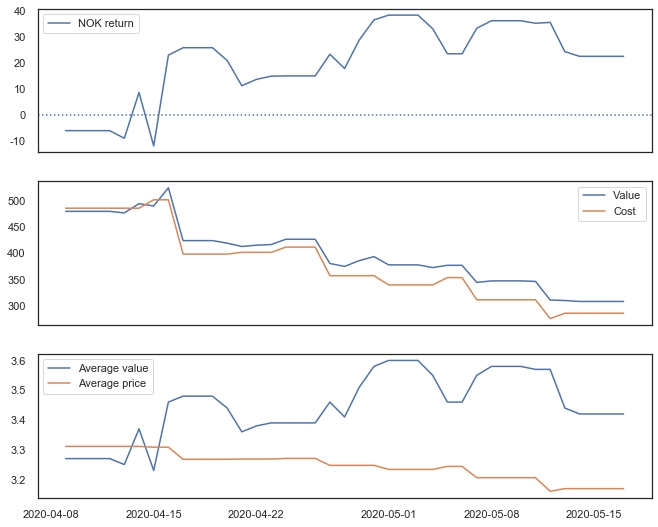

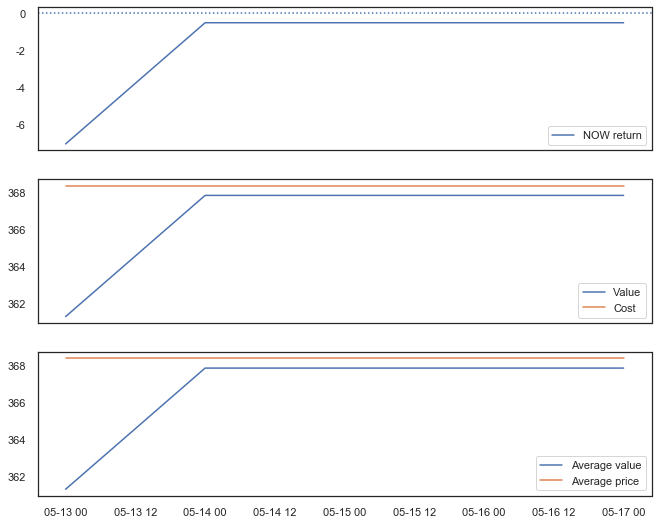

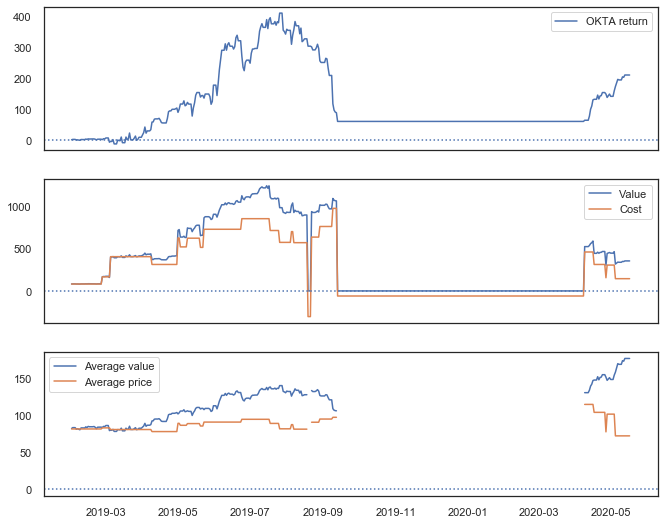

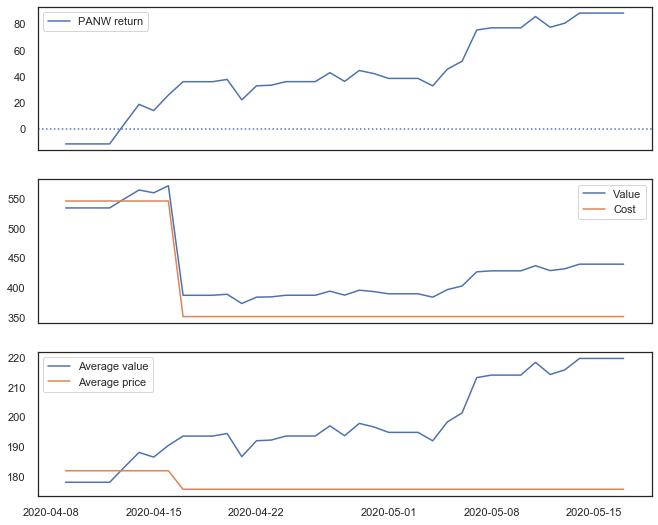

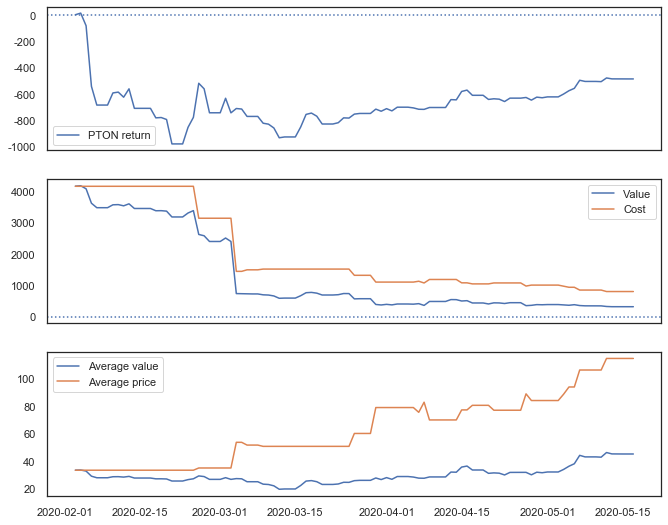

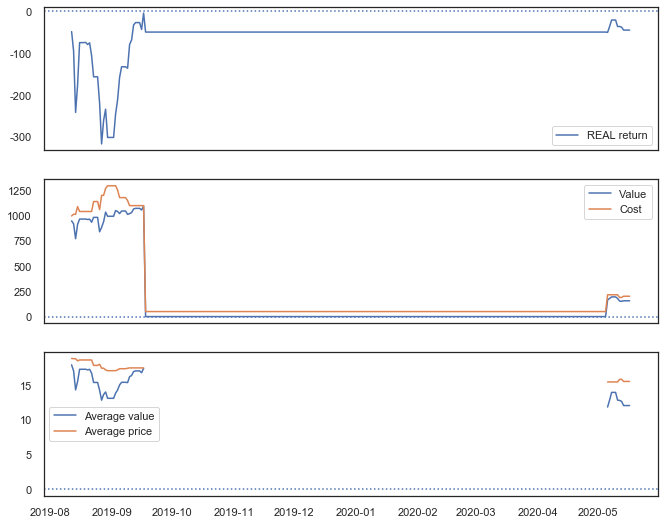

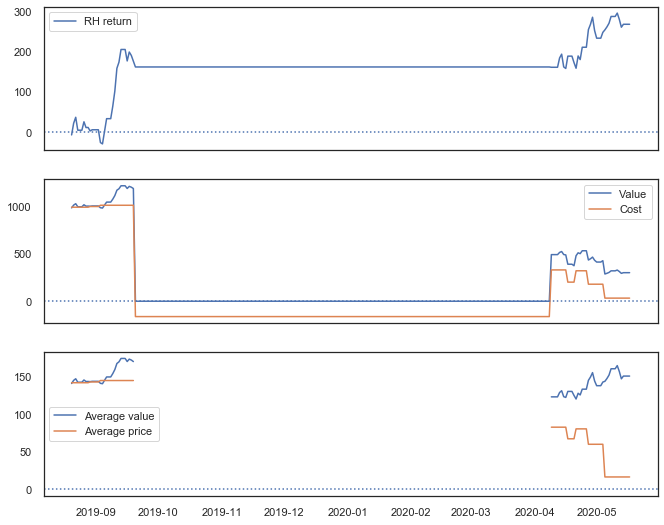

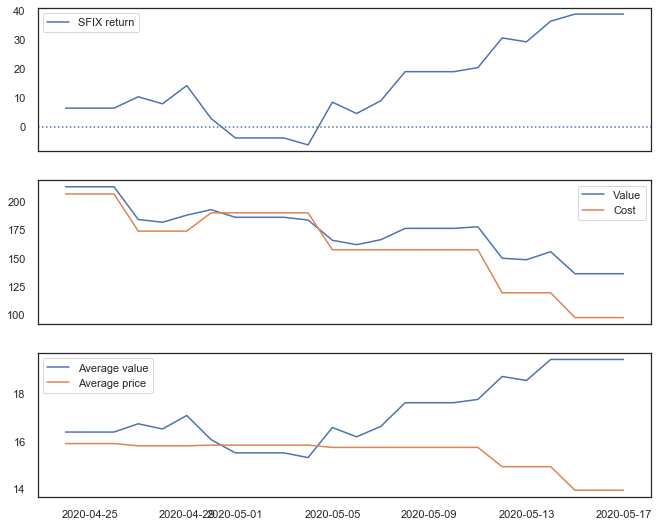

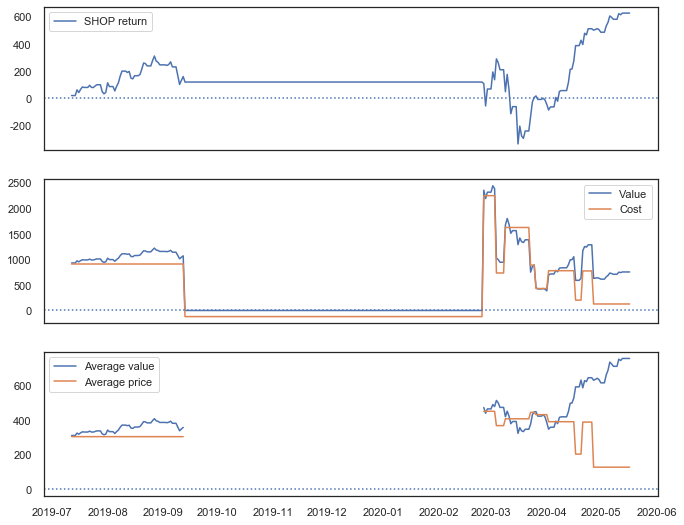

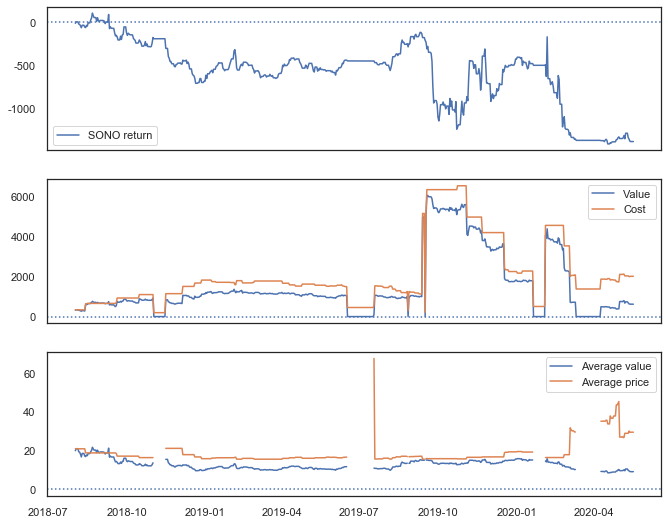

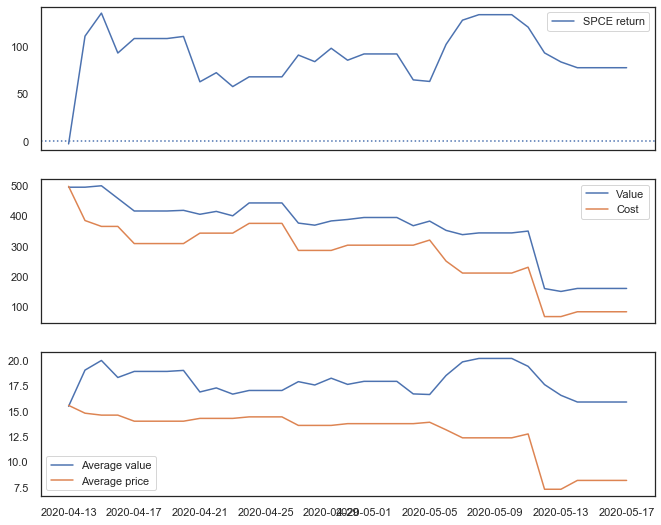

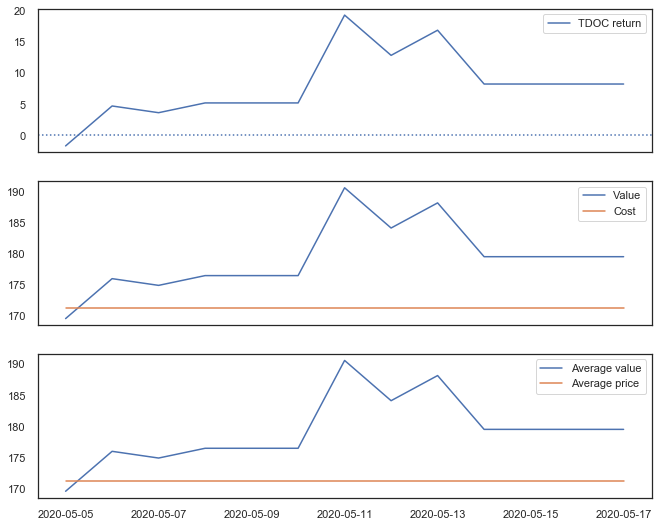

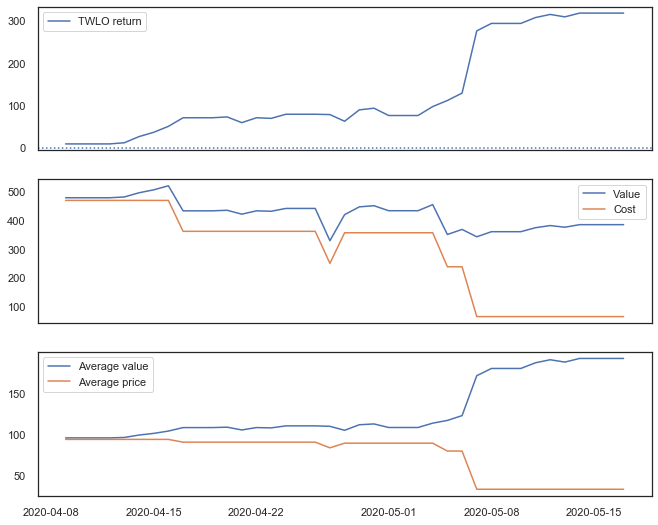

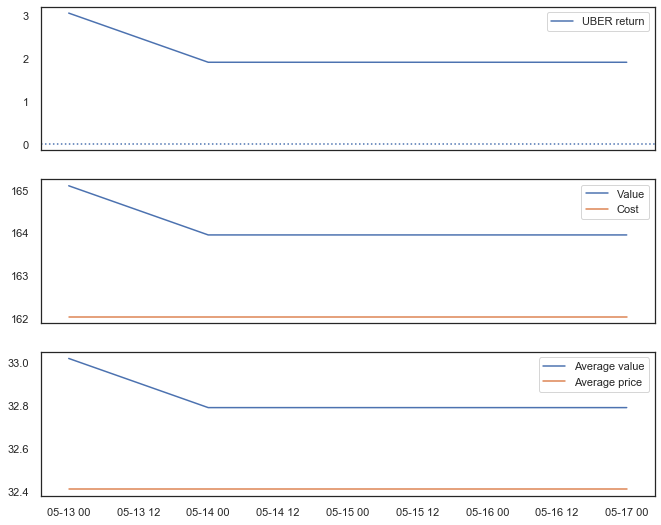

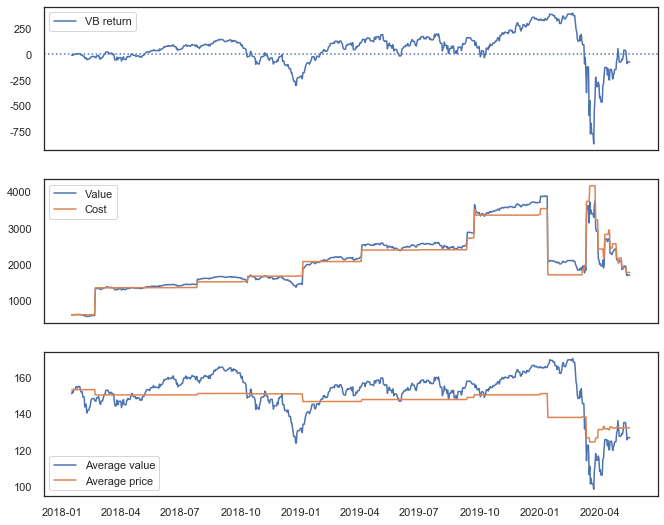

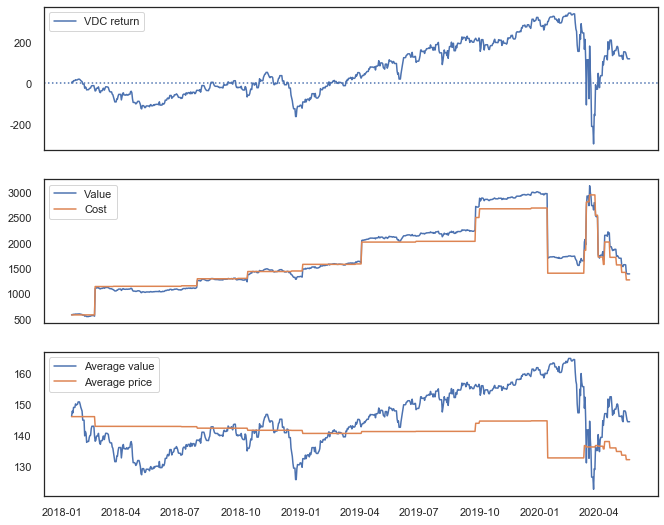

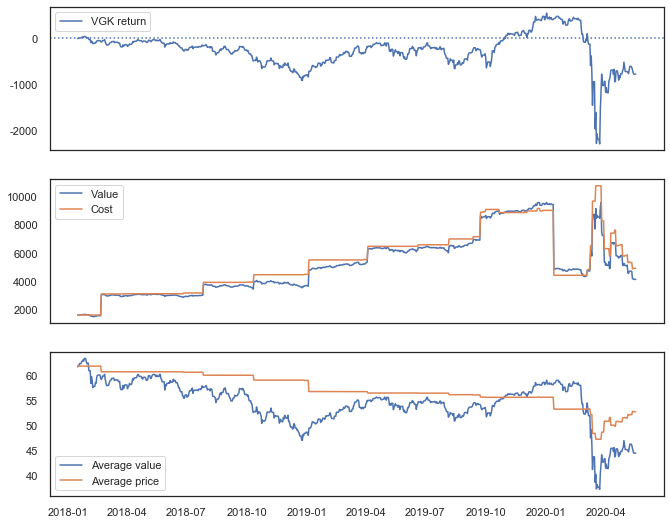

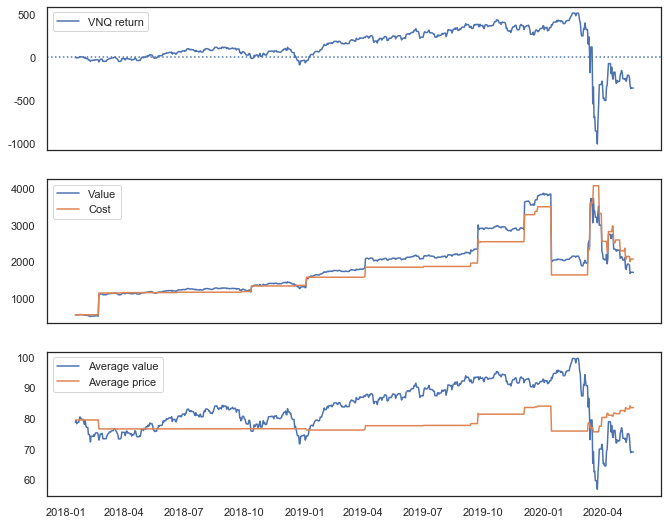

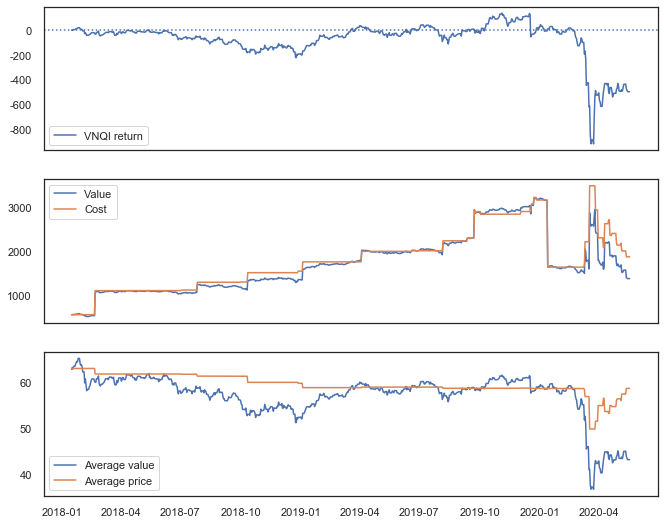

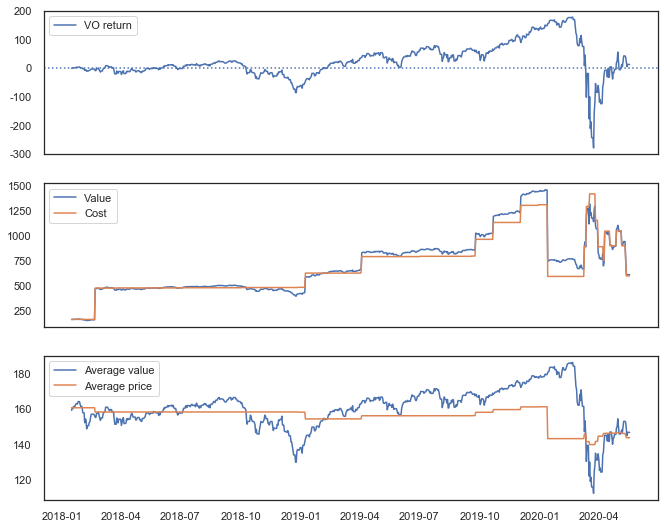

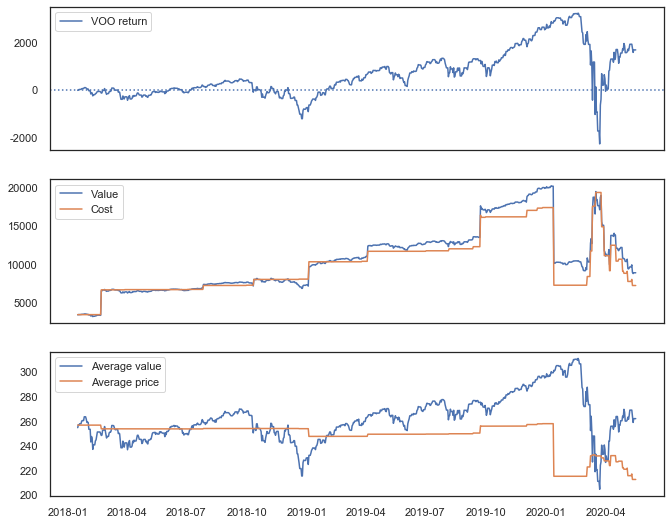

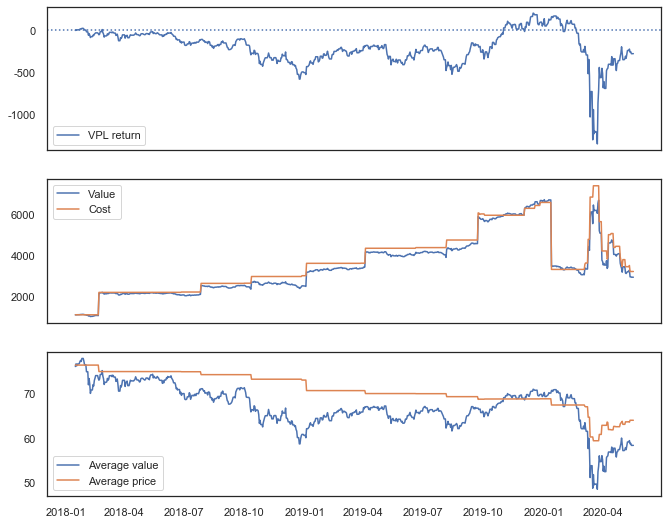

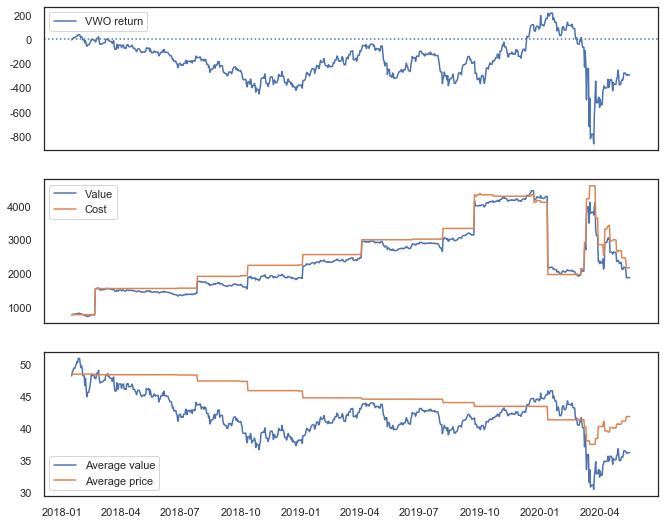

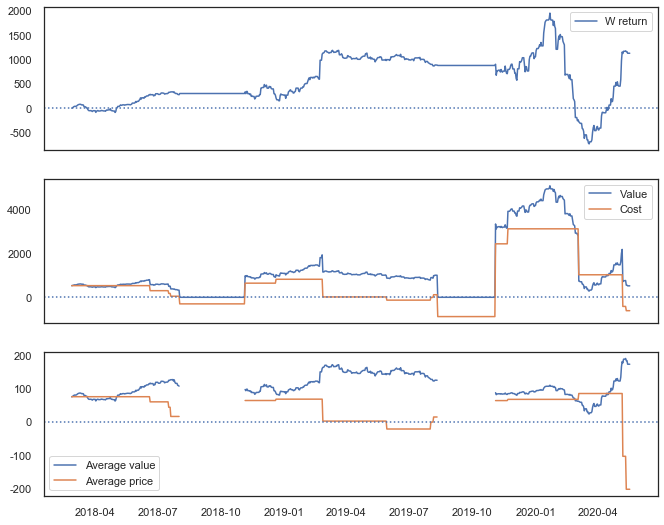

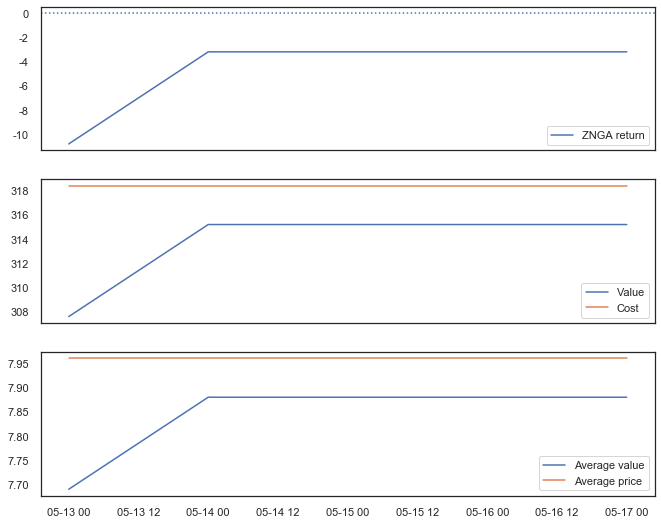

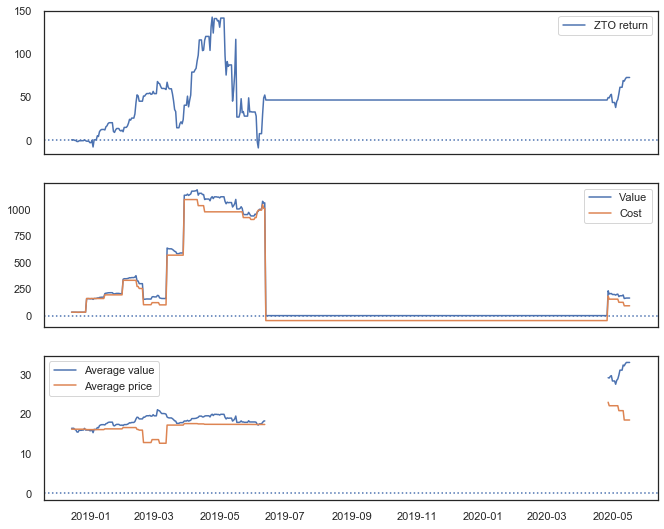

In [81]:
for ticker in tot.tickers:
    plot_security_performance(portfolio=tot, ticker=ticker)